In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import regularizers

2023-08-11 15:35:48.292162: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 15:35:48.722751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
csv_file = 'cubesopti.csv'
dataframe = pd.read_csv(csv_file)

In [3]:
dataframe.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c50,c51,c52,c53,c54,move,num,move-1,move-2,move-3
0,1,2,1,2,0,0,1,3,3,0,...,5,2,5,3,4,0,0,-1,-1,-1
1,4,2,1,2,0,0,4,3,3,5,...,5,0,5,3,0,7,1,0,-1,-1
2,1,0,3,2,0,3,4,2,4,5,...,5,0,5,3,0,5,2,7,0,-1
3,1,0,3,2,0,3,3,0,0,3,...,5,0,5,3,0,13,3,5,7,0
4,0,0,3,3,0,2,3,0,1,3,...,5,0,5,3,0,0,4,13,5,7


In [4]:
dataframe = dataframe.loc[:, ~dataframe.columns.str.contains('^Unnamed')]

In [5]:
dataframe.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c50,c51,c52,c53,c54,move,num,move-1,move-2,move-3
0,1,2,1,2,0,0,1,3,3,0,...,5,2,5,3,4,0,0,-1,-1,-1
1,4,2,1,2,0,0,4,3,3,5,...,5,0,5,3,0,7,1,0,-1,-1
2,1,0,3,2,0,3,4,2,4,5,...,5,0,5,3,0,5,2,7,0,-1
3,1,0,3,2,0,3,3,0,0,3,...,5,0,5,3,0,13,3,5,7,0
4,0,0,3,3,0,2,3,0,1,3,...,5,0,5,3,0,0,4,13,5,7


In [6]:
#dataframe.drop(columns=['num'], inplace=True)

In [7]:
dataframe.drop_duplicates(inplace=True)

In [8]:
train, val = train_test_split(dataframe, test_size=0.20)
print(len(train), 'train examples')
print(len(val), 'validation examples')

2752626 train examples
688157 validation examples


In [9]:
mes_features = train.copy()
mes_labels = mes_features['move']
mes_features.drop(columns=['move'], inplace=True)
mes_features = np.array(mes_features)

mes_val_features = val.copy()
mes_val_labels = mes_val_features['move']
mes_val_features.drop(columns=['move'], inplace=True)
mes_val_features = np.array(mes_val_features)

In [10]:
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization()
normalizer.adapt(mes_features)

2023-08-11 15:36:00.576285: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-11 15:36:00.594216: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-11 15:36:00.594636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
#model = tf.keras.Sequential([
#  normalizer,
#  layers.Dense(160, activation='relu'),
#  layers.Dropout(0.25),
#  layers.Dense(160, activation='relu'),
#  layers.Dropout(0.25),
#  layers.Dense(160, activation='relu'),
#  layers.Dropout(0.25),
#  layers.Dense(72, activation='relu'),
#  layers.Dropout(0.25),
#  layers.Dense(18, activation='softmax'),
#])

In [12]:
model = tf.keras.Sequential([
  normalizer,
  layers.Dense(760, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(760, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(760, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(760, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(172, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(18, activation='softmax'),
])

In [13]:
opt = tf.keras.optimizers.Adam()
#opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss ='sparse_categorical_crossentropy', metrics=['accuracy'],
              optimizer = opt)

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
model.fit(mes_features, mes_labels, epochs=1000, batch_size=3084, validation_data=(mes_val_features, mes_val_labels), callbacks=[early_stopping])

model.summary()

Epoch 1/1000


2023-08-11 15:36:49.669077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-11 15:36:49.671230: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56097cb7b1e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-11 15:36:49.671241: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-08-11 15:36:49.675176: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-11 15:36:49.774928: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8801
2023-08-11 15:36:49.807969: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-11 15:36:49.85470

893/893 [==============================] - 6s 5ms/step - loss: 0.8458 - accuracy: 0.7337 - val_loss: 0.4340 - val_accuracy: 0.8680
Epoch 2/1000
893/893 [==============================] - 4s 4ms/step - loss: 0.4716 - accuracy: 0.8516 - val_loss: 0.2837 - val_accuracy: 0.9121
Epoch 3/1000
893/893 [==============================] - 4s 5ms/step - loss: 0.3618 - accuracy: 0.8858 - val_loss: 0.2288 - val_accuracy: 0.9266
Epoch 4/1000
893/893 [==============================] - 4s 5ms/step - loss: 0.3057 - accuracy: 0.9029 - val_loss: 0.1971 - val_accuracy: 0.9362
Epoch 5/1000
893/893 [==============================] - 4s 5ms/step - loss: 0.2704 - accuracy: 0.9134 - val_loss: 0.1777 - val_accuracy: 0.9417
Epoch 6/1000
893/893 [==============================] - 4s 5ms/step - loss: 0.2464 - accuracy: 0.9208 - val_loss: 0.1633 - val_accuracy: 0.9462
Epoch 7/1000
893/893 [==============================] - 4s 4ms/step - loss: 0.2293 - accuracy: 0.9261 - val_loss: 0.1529 - val_accuracy: 0.9492
Epoch

In [15]:
model.save('saved/cubes_307')

INFO:tensorflow:Assets written to: saved/cubes_307/assets


INFO:tensorflow:Assets written to: saved/cubes_307/assets


In [16]:
cube_au_pif = np.array([0,3,2,4,0,0,3,5,5,3,0,3,2,1,3,5,2,2,1,4,0,5,2,3,0,3,2,4,1,5,1,3,0,4,1,5,4,4,1,5,4,0,1,2,3,4,1,2,2,5,5,0,4,1,0,-1,-1,-1])
cube_au_pif = cube_au_pif.reshape(1,58).astype("float32")
probas = model.predict(cube_au_pif)
print(probas)
print(probas.argmax())

1/1 [==============================] - 0s 51ms/step
[[6.3816607e-03 2.3860468e-03 1.9375330e-03 1.6062491e-02 1.8580310e-02
  3.7711991e-03 3.5724137e-03 2.8989695e-03 9.9711346e-05 6.9414512e-03
  9.5284402e-02 6.2305754e-04 3.2012132e-01 1.3122063e-03 1.5678640e-03
  2.2593858e-04 5.1727700e-01 9.5640268e-04]]
16


In [17]:
model.evaluate(mes_val_features, mes_val_labels)

21505/21505 [==============================] - 31s 1ms/step - loss: 0.0391 - accuracy: 0.9856


[0.03914111480116844, 0.985607922077179]

21505/21505 [==============================] - 20s 929us/step


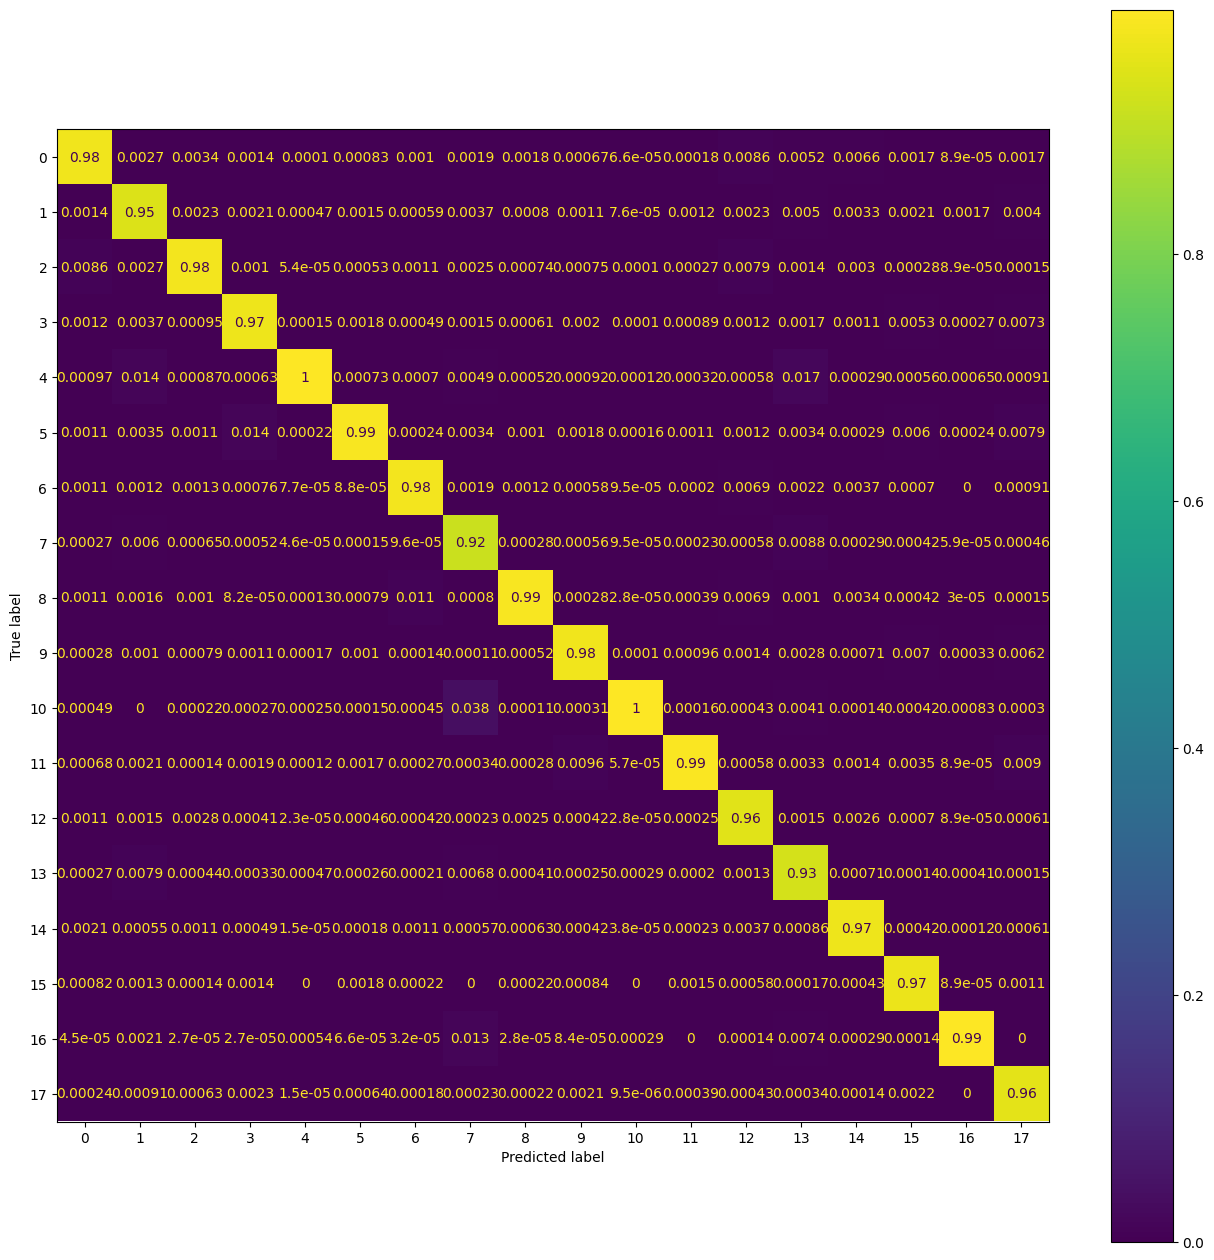

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_prediction = model.predict(mes_val_features.astype("float32"))
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=mes_val_labels
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')
import matplotlib.pyplot as plt
cmp = ConfusionMatrixDisplay(result)
fig, ax = plt.subplots(figsize=(16,16))
cmp.plot(ax=ax)

In [19]:
dataframe.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c50,c51,c52,c53,c54,move,num,move-1,move-2,move-3
0,1,2,1,2,0,0,1,3,3,0,...,5,2,5,3,4,0,0,-1,-1,-1
1,4,2,1,2,0,0,4,3,3,5,...,5,0,5,3,0,7,1,0,-1,-1
2,1,0,3,2,0,3,4,2,4,5,...,5,0,5,3,0,5,2,7,0,-1
3,1,0,3,2,0,3,3,0,0,3,...,5,0,5,3,0,13,3,5,7,0
4,0,0,3,3,0,2,3,0,1,3,...,5,0,5,3,0,0,4,13,5,7


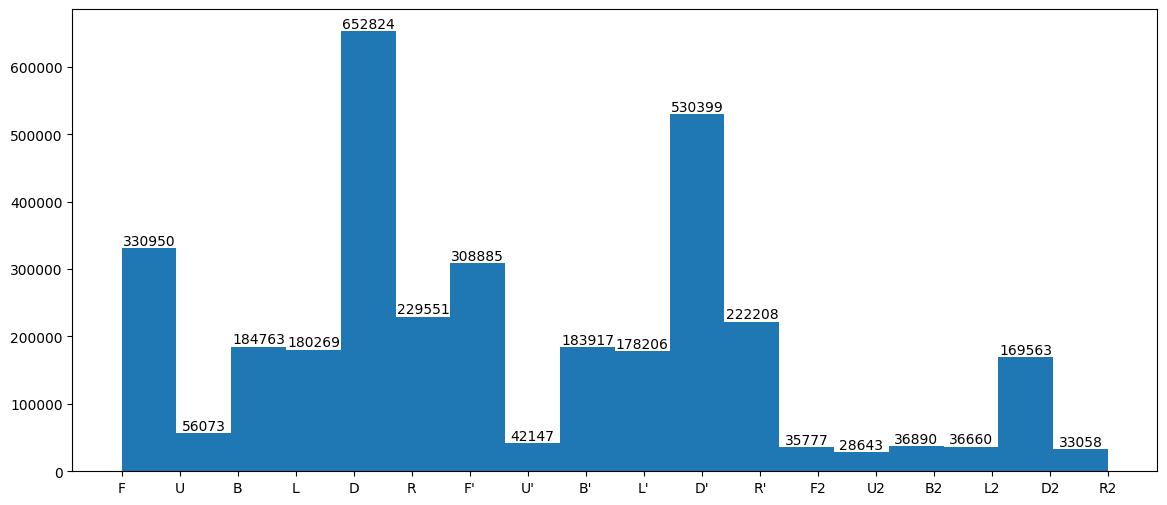

In [20]:
plt.figure(figsize=(14,6))
counts, edges, bars = plt.hist(dataframe['move'], bins=18)
plt.bar_label(bars)
plt.xticks(np.arange(18), ['F', 'U', 'B', 'L', 'D', 'R', "F'", "U'", "B'", "L'", "D'", "R'", 'F2', 'U2', 'B2', 'L2', 'D2', 'R2'])
plt.show()